# Определение перспективного тарифа для телеком компании

**Учебная работа. Самостоятельный исследовательский проект в рамках курса "Аналитик данных" Яндекс.Практикума  
Спринт 4 "Статистический анализ данных"**

## Общая информация о проекте
### Описание задания
Необходимо изучить и сравнить два тарифных плана компании «Мегалайн» — федерального оператора сотовой связи: «Смарт» и «Ультра». Для анализа доступна выборка данных: 500 пользователей «Мегалайна».

###  Цель
Выяснить, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт» и средняя выручка пользователей из Москвы и из других регионов.

###  Задачи
1. Подготовить данные: найти и удалить дублирующиеся данные, найти и обработать пропущенные значения, найти и исправить ошибки в данных.
2. Рассчитать и добавить в таблицу параметры, которые понадобятся для сравнения двух тарифов (количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя).
3. Проанализировать  поведение клиентов оператора, исходя из выборки.
4. Ответить на вопросы исследования (проверить гипотезы).
5. Описать и оформить результаты.

### Гипотезы
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

###  Данные
Архив объявлений о продаже квартир получен в виде пяти файлов:
   calls.csv 
   internet.csv
   messages.csv
   tariffs.csv
   users.csv

###  Описание данных
Таблица `users` (информация о пользователях):  
`user_id` — уникальный идентификатор пользователя  
`first_name` — имя пользователя  
`last_name` — фамилия пользователя  
`age` — возраст пользователя (годы)  
`reg_date` — дата подключения тарифа (день, месяц, год)  
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
`city` — город проживания пользователя  
`tarif` — название тарифного плана  
  
Таблица `calls` (информация о звонках):  
`id` — уникальный номер звонка  
`call_date` — дата звонка  
`duration` — длительность звонка в минутах  
`user_id` — идентификатор пользователя, сделавшего звонок  
  
Таблица `messages` (информация о сообщениях):  
`id` — уникальный номер сообщения  
`message_date` — дата сообщения  
`user_id` — идентификатор пользователя, отправившего сообщение  
  
Таблица `internet` (информация об интернет-сессиях):  
`id` — уникальный номер сессии  
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
`session_date` — дата интернет-сессии  
`user_id` — идентификатор пользователя  
  
Таблица `tariffs` (информация о тарифах):  
`tariff_name` — название тарифа  
`rub_monthly_fee` — ежемесячная абонентская плата в рублях  
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

### План работы  
1. Изучить данные по каждому столбцу. Выявить аномалии, исправить ошибки и по возможности заполнить пропуски. При необходимости изменить тип данных в столбце.
2. Проверить данные на наличие дубликатов.
3. Создать таблицу `data`, рассчитать и добавить в неё недостающие параметры (количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя).
4. Проанализировать и описать особенности поведения клиентов на каждом из тарифных планов.
5. Ответить на вопросы исследования (проверить гипотезы).
6. Описать полученные выводы.

## Загрузка и обзор данных

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

Создаём библиотеку стилей

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
        

### Информация о клиентах

Загружаем файл `users`:

In [3]:
users = pd.read_csv('/datasets/users.csv')

Просматриваем информацию о столбцах:

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропусков нет. В столбце `churn_date` всего 38 строк, но мы знаем, что это дата окончания использования тарифа, то есть пропуски означают, что клиент пользуется этим тарифом на момент выгрузки данных.

У нескольких столбцов нужно изменить тип данных:  
- `user_id` с целочисленного на вещественный;
- `churn_date` с вещественного на дату;
- `reg_date ` с вещественного на дату.

### Инфонрмация о звонках

Загружаем файл `calls` и просматриваем информацию о столбцах:

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет.  
Нужно изменить тип данных для столбцов:
- `call_date` с вещественного на дату;
- `user_id ` с целочисленного на вещественный.

### Информация о сообщениях

Загружаем файл `messages` и просматриваем информацию о столбцах:

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков нет.  
Нужно изменить тип данных для столбцов:
- `message_date` с вещественного на дату;
- `user_id ` с целочисленного на вещественный.

### Информация об использованном трафике

Загружаем файл `internet` и просматриваем информацию о столбцах:

In [7]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропусков нет. 

Нужно изменить тип данных для столбцов:
- `session_date` с вещественного на дату;
- `user_id ` с целочисленного на вещественный.
  
Есть дополнительный, не указанный в описании столбец `Unnamed`, нужно проверить, что в нём хранится. 

In [8]:
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Похлже, что в столбце `Unnamed` продублированы индексы. Это стоит проверить, если это так, его можно будет удалить.  

### Информация о тарифах

Загружаем файл `tariffs` и просматриваем информацию о столбцах:

In [9]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Пропусков нет, типы данных правильные.

### Вывод  
После первого знакомства с данными можно сказать о том, что:  
- в данных нет пропусков, это хорошо.
- в некоторых столбцах нужно исправить тип данных.
- в одной из таблиц оказался лишний столбец, который, скорее всего, дублирует индексы.

## Предобработка данных

В рамках предобработки данных мы последовательно подготовим каждую из таблиц к работе (проверим все столбцы на наличие ошибок и странных значений и исправим типы данных), рассчитаем недостающие параметры и добавим их в общую таблицу `data`.

### Подготовка данных о пользователях
Начнём с таблицы `users`. 

Изменим типы данных и сделаем проверку. Для этого распечатаем ещё раз информацию о таблице и первые 5 строк таблицы.

In [10]:
users.info()
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
users['user_id'] = users['user_id'].astype('object')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

users.info()
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посмотрим на минимальные и максимальные значения.

In [12]:
display(users.agg(['min', 'max']))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
min,1000,18,2018-08-17,Архангельск,Авксентий,Ёлчина,2018-01-01,smart
max,1499,75,2018-12-30,Ярославль,Яна,Яшина,2018-12-31,ultra


В нашем распоряжении есть 500 записей о клиентах c id от 1000 до 1499, подключивших один из исследуемых тарифов в период с 1 января по 31 декабря 2018 года.  
Проверим, сколько клиентов на каждом из тарифов.

In [13]:
users.groupby('tariff')['tariff'].value_counts()

tariff  tariff
smart   smart     351
ultra   ultra     149
Name: tariff, dtype: int64

На тарифе "Smart" пользователей в два раза больше, чем на тарифе "Ultra". Это и естественно, учитывая, что он дешевле.

Проверим таблицу на наличие дублирующихся строк.

In [14]:
users.duplicated().sum()

0

In [15]:
users.groupby(['last_name', 'first_name'])['city'].value_counts().sort_values()

last_name  first_name  city           
Ёлчина     Валерия     Санкт-Петербург    1
Малышев    Авксентий   Москва             1
Малинина   Юлия        Москва             1
Малинин    Рустам      Волгоград          1
Малахов    Исак        Астрахань          1
                                         ..
Березина   Луиза       Казань             1
           Дайна       Череповец          1
Белякова   Джулия      Санкт-Петербург    1
Болдырева  Оксана      Нижний Тагил       1
Яшина      Эльмира     Новороссийск       1
Name: city, Length: 500, dtype: int64

Дублирующихся строк нет.  
Нам нужно будет проверить гипотезу о том, отличается ли выручка пользователей Москвы от выручки из других регионов, так что сразу добавим в таблицу столбец `moscow` (при помощи функции).

In [16]:
def city(str):
    if str == "Москва":
        return True
    else:
        return False

In [17]:
users['moscow'] = users['city'].apply(city)
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,moscow
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,True
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,False
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,True
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,False


Скопируем строки, нужные для анализа в общую таблицу `data`. Нам понадобится вся информация, кроме имён и фамилий клиентов.

In [18]:
data = users[['user_id', 'tariff', 'age', 'city', 'reg_date', 'churn_date', 'moscow']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
user_id       500 non-null object
tariff        500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
churn_date    38 non-null datetime64[ns]
moscow        500 non-null bool
dtypes: bool(1), datetime64[ns](2), int64(1), object(3)
memory usage: 24.1+ KB


In [19]:
data.columns

Index(['user_id', 'tariff', 'age', 'city', 'reg_date', 'churn_date', 'moscow'], dtype='object')

Данные о пользователях проверены и готовы к роботе.

### Подготовка данных о звонках  
Проверим и подготовим к анализу таблицу `calls`. Изменим на нужный тип данных столбцов. Для этого ещё раз распечатаем информацию о столбцах и первые строки таблицы.

In [20]:
calls.info()
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
calls['user_id'] = calls['user_id'].astype('object')

calls.info()
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Посмотрим на минимальные и максимальные значения, чтобы проверить, есть ли странные и выбивающиеся значения.

In [22]:
display(calls.agg(['min', 'max']))

,id,call_date,duration,user_id
min,1000_0,2018-01-01,0.0,1000
max,1499_99,2018-12-31,38.0,1499


Первая запись - 1 января, последняя - 31 декабря 2018 года, минимальная продолжительность звонка - 0 минут (неотвеченный вызов), а максимальная - 38 минут. Похоже, всё в порядке.

Добавим в таблицу столбцы и рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.  
У оператора "Мегалайн" помитутная тарификация, так что нужно округлить длительность всех звонков до минут в большую сторону.

In [23]:
calls['duration'] = np.ceil(calls['duration'])
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Создаём столбец `month` и записываем в него месяц совершения звонка.

In [24]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Для того, чтобы посчитать количество и длительность звонков каждого абонента по месяцам, создаём сводную таблицу `calls_month`. По строкам размещаем данные для каждого пользователя и для каждого месяца, рассчитываем общее количество и длительность звонков.

In [25]:
calls_month = calls.pivot_table(
    index=['user_id', 'month'],
    values=['duration'],
    aggfunc=['count', 'sum']
)

display(calls_month.head(10))

count      sum
              duration duration
user_id month                  
1000    5           22    159.0
        6           43    172.0
        7           47    340.0
        8           52    408.0
        9           58    466.0
        10          57    350.0
        11          43    338.0
        12          46    333.0
1001    11          59    430.0
        12          63    414.0

Переименуем столбцы, чтобы было удобнее в них ориентироваться:

In [26]:
calls_month.columns = ['calls', 'duration']
display(calls_month.head())

calls  duration
user_id month                 
1000    5         22     159.0
        6         43     172.0
        7         47     340.0
        8         52     408.0
        9         58     466.0

Скопируем из мультииндекса столбец `month`, чтобы при добавлении в таблицу дата он не потерялся.

In [27]:
calls_month['month'] = calls_month.index.get_level_values(1)
display(calls_month.head(10))

calls  duration  month
user_id month                        
1000    5         22     159.0      5
        6         43     172.0      6
        7         47     340.0      7
        8         52     408.0      8
        9         58     466.0      9
        10        57     350.0     10
        11        43     338.0     11
        12        46     333.0     12
1001    11        59     430.0     11
        12        63     414.0     12

Теперь данные по количеству и длительности звонков каждого абонента по месяцам можно добавить в основную таблицу `data`.

In [28]:
data = data.merge(calls_month, on='user_id', how='left')
display(data.head())

,user_id,tariff,age,city,reg_date,churn_date,moscow,calls,duration,month
0,1000,ultra,52,Краснодар,2018-05-25,NaT,False,22.0,159.0,5.0
1,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,172.0,6.0
2,1000,ultra,52,Краснодар,2018-05-25,NaT,False,47.0,340.0,7.0
3,1000,ultra,52,Краснодар,2018-05-25,NaT,False,52.0,408.0,8.0
4,1000,ultra,52,Краснодар,2018-05-25,NaT,False,58.0,466.0,9.0


### Подготовка данных о сообщениях  
Проверим и подготовим к анализу таблицу `messages`. Изменим на нужный тип данных столбцов. Для этого ещё раз распечатаем информацию о столбцах и первые строки таблицы.

In [29]:
messages.info()
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Меняем типы данных столбцов:

In [30]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
messages['user_id'] = messages['user_id'].astype('object')

messages.info()
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Проверяем, есть ли выбивающиеся значения (слишком большие или слишком маленькие):

In [31]:
display(messages.agg(['min', 'max']))

,id,message_date,user_id
min,1000_0,2018-01-02,1000
max,1499_99,2018-12-31,1499


Создадим столбец `month`  и сохраним в него месяц из `message_date`.

In [32]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(messages.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Для того, чтобы посчитать количество отправленных сообщений по месяцам, создадим сводную таблицу `messages_month`.

In [33]:
messages_month = messages.pivot_table(
    index=['user_id', 'month'],
    values='id',
    aggfunc='count'
)

display(messages_month.head())

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

Переименуем столбцы, чтобы было понятно, что речь идёт о количестве сообщений в конкретном месяце.

In [34]:
messages_month.columns = ['messages']
display(messages_month.head())

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

Добавляем данные о количестве сообщений по месяцам в таблицу `data`.

In [35]:
data = data.merge(messages_month, on=['user_id', 'month'], how='left')
display(data.head())

,user_id,tariff,age,city,reg_date,churn_date,moscow,calls,duration,month,messages
0,1000,ultra,52,Краснодар,2018-05-25,NaT,False,22.0,159.0,5.0,22.0
1,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,172.0,6.0,60.0
2,1000,ultra,52,Краснодар,2018-05-25,NaT,False,47.0,340.0,7.0,75.0
3,1000,ultra,52,Краснодар,2018-05-25,NaT,False,52.0,408.0,8.0,81.0
4,1000,ultra,52,Краснодар,2018-05-25,NaT,False,58.0,466.0,9.0,57.0


### Подготовка данных об интернет-трафике  
Проверим и подготовим к анализу таблицу `internet`. Изменим на нужный тип данных столбцов. Для этого ещё раз распечатаем информацию о столбцах и первые строки таблицы.

In [36]:
internet.info()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Исправим типы данных в столбцах.

In [37]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
internet['user_id'] = internet['user_id'].astype('object')

internet.info()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Проверим данные на наличие выбивающихся значений (слишком больших или слишком маленьких)

In [38]:
display(internet.agg(['min', 'max']))

,Unnamed: 0,id,mb_used,session_date,user_id
min,0,1000_0,0.00,2018-01-01,1000
max,149395,1499_99,1724.83,2018-12-31,1499


Столбец `Unnamed: 0` действительно дублирует индексы (самое большое значение в нём на 1 меньше, чем количество строк). Удаляем его.

In [39]:
internet = internet.drop('Unnamed: 0', axis=1)
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Создадим столбец `month`  и сохраним в него месяц из `session_date`.

In [40]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
display(internet.head())

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Оператор "Мегалайн" округляет до гигабайт количество потраченных мегабайт в конце месяца. Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя при помощи сводной таблицы `internet_month`.

In [41]:
internet_month = internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum'
)

display(internet_month.head())

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

Округляем получившуюся сумму до гигабайт в большую сторону и переименовываем столбец в `gb_used`.

In [42]:
internet_month['mb_used'] = internet_month['mb_used'] / 1024
internet_month = np.ceil(internet_month)
internet_month = internet_month.rename(columns = {'mb_used' : 'gb_used'})
display(internet_month.head())

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

Добавляем данные об использованном трафике в таблицу `data`.

In [43]:
data = data.merge(internet_month, on=['user_id', 'month'], how='left')
display(data.head())

,user_id,tariff,age,city,reg_date,churn_date,moscow,calls,duration,month,messages,gb_used
0,1000,ultra,52,Краснодар,2018-05-25,NaT,False,22.0,159.0,5.0,22.0,3.0
1,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,172.0,6.0,60.0,23.0
2,1000,ultra,52,Краснодар,2018-05-25,NaT,False,47.0,340.0,7.0,75.0,14.0
3,1000,ultra,52,Краснодар,2018-05-25,NaT,False,52.0,408.0,8.0,81.0,14.0
4,1000,ultra,52,Краснодар,2018-05-25,NaT,False,58.0,466.0,9.0,57.0,15.0


### Подготовка информации о тарифе  
Проверим и подготовим к анализу таблицу `tariffs`.  
Ещё раз распечатаем информацию о столбцах.

In [44]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Чтобы добавить информацию о тарифах в таблицу `data`, нужно переименовать столбец `tariff_name` в `tariff`.

In [45]:
tariffs = tariffs.rename(columns={'tariff_name' : 'tariff'})
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')

Объединим таблицу `data` и таблицу `tariffs` по столбцу `tariff`.

In [46]:
data = data.merge(tariffs, on='tariff', how='left')
display(data.head())

,user_id,tariff,age,city,reg_date,churn_date,moscow,calls,duration,month,messages,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,52,Краснодар,2018-05-25,NaT,False,22.0,159.0,5.0,22.0,3.0,1000,30720,3000,1950,150,1,1
1,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,172.0,6.0,60.0,23.0,1000,30720,3000,1950,150,1,1
2,1000,ultra,52,Краснодар,2018-05-25,NaT,False,47.0,340.0,7.0,75.0,14.0,1000,30720,3000,1950,150,1,1
3,1000,ultra,52,Краснодар,2018-05-25,NaT,False,52.0,408.0,8.0,81.0,14.0,1000,30720,3000,1950,150,1,1
4,1000,ultra,52,Краснодар,2018-05-25,NaT,False,58.0,466.0,9.0,57.0,15.0,1000,30720,3000,1950,150,1,1


Данные о трафике сейчас в разном формате: использованный трафик и цена приведены за гигабайт, а предоплаченный трафик по тарифу - в мегабайтах. Переведём в гигабайты и переименуем столбец `mb_per_month_included`.

In [47]:
data['mb_per_month_included'] = data['mb_per_month_included']/1024
data = data.rename(columns={'mb_per_month_included' : 'gb_per_month_included'})
display(data.head(10))

,user_id,tariff,age,city,reg_date,churn_date,moscow,calls,duration,month,messages,gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,52,Краснодар,2018-05-25,NaT,False,22.0,159.0,5.0,22.0,3.0,1000,30.0,3000,1950,150,1,1
1,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,172.0,6.0,60.0,23.0,1000,30.0,3000,1950,150,1,1
2,1000,ultra,52,Краснодар,2018-05-25,NaT,False,47.0,340.0,7.0,75.0,14.0,1000,30.0,3000,1950,150,1,1
3,1000,ultra,52,Краснодар,2018-05-25,NaT,False,52.0,408.0,8.0,81.0,14.0,1000,30.0,3000,1950,150,1,1
4,1000,ultra,52,Краснодар,2018-05-25,NaT,False,58.0,466.0,9.0,57.0,15.0,1000,30.0,3000,1950,150,1,1
5,1000,ultra,52,Краснодар,2018-05-25,NaT,False,57.0,350.0,10.0,73.0,15.0,1000,30.0,3000,1950,150,1,1
6,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,338.0,11.0,58.0,15.0,1000,30.0,3000,1950,150,1,1
7,1000,ultra,52,Краснодар,2018-05-25,NaT,False,46.0,333.0,12.0,70.0,10.0,1000,30.0,3000,1950,150,1,1
8,1001,smart,41,Москва,2018-11-01,NaT,True,59.0,430.0,11.0,NaN,18.0,50,15.0,500,550,200,3,3
9,1001,smart,41,Москва,2018-11-01,NaT,True,63.0,414.0,12.0,NaN,14.0,50,15.0,500,550,200,3,3


Пользователи подключались к тарифу в разное время, раньше момента подключния данных нет. Заменим пустые значения на нули и сделаем проверку.

In [48]:
print('calls', data['calls'].isna().sum())
print('duration', data['duration'].isna().sum())
print('messages', data['messages'].isna().sum())
print('gb_used', data['gb_used'].isna().sum())

calls 8
duration 8
messages 504
gb_used 19


In [49]:
data['calls'] = data['calls'].fillna(0)
data['duration'] = data['duration'].fillna(0)
data['messages'] = data['messages'].fillna(0)
data['gb_used'] = data['gb_used'].fillna(0)

print('calls', data['calls'].isna().sum())
print('duration', data['duration'].isna().sum())
print('messages', data['messages'].isna().sum())
print('gb_used', data['gb_used'].isna().sum())

calls 0
duration 0
messages 0
gb_used 0


```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

In [62]:
data["user_id"].nunique()

500

### Расчёт месячной выручки
Посчитаем выручку с каждого пользователя. 
Напишем функцию `calculate_income`, которая будет рассчитывать дополнительную прибыль с пользователя со звонков, сообщений и трафика сверх тарифного пакета.
Функция принимает аргументы: строка таблицы и индексы столбцов, соответственно относящиеся к использованному объёму услуг, включённому в тариф и стоимость на услуги сверх пакета. Если объём использованной услуги меньше или равен включённой в тарифный план, функция возвращает значение дополнительной прибыли 0. Если больше, функция возвращает дополнительную стоимость.

In [50]:
def calculate_income(row, used, included, price):
    """Функция для расчёта стоимости услуг сверх включённых в тарифный план.
    Принимает аргументы: 
    - строка таблицы и индексы столбцов, соответственно относящиеся к использованному объёму услуг, 
    включённому в тариф и стоимость на услуги сверх пакета. 
    Если объём использованной услуги меньше или равен включённой в тарифный план, 
    функция возвращает значение дополнительной прибыли 0. 
    Если больше, функция возвращает размер дополнительной прибыли."""
    
    extra_services = row[included] - row[used]
    if extra_services >= 0:
        return 0
    else:
        extra_income = extra_services * row[price]*(-1)
        return extra_income

Выведем индексы интересующих нас столбцов:

In [51]:
out_min = np.argwhere(data.columns.isin(['duration', 'minutes_included', 'rub_per_minute'])).ravel()
out_mess = np.argwhere(data.columns.isin(['messages', 'messages_included', 'rub_per_message'])).ravel()
out_gb = np.argwhere(data.columns.isin(['gb_used', 'gb_per_month_included', 'rub_per_gb'])).ravel()
print('минуты', out_min)
print('сообщения', out_mess)
print('гигабайты', out_gb)

минуты [ 8 14 18]
сообщения [10 12 17]
гигабайты [11 13 16]


Применяем функцию `calculate_income`, рассчитываем стоимость дополнительных минут, сообщений и трафика для каждого пользователя.  
Создаём столбец `extra_income`, суммируя стоимость всех дополнительных услуг в данном месяце.  
Создаём столбец `total_income` - сумма платы за тариф и всех дополнительных услуг.

In [52]:
data['extra_calls'] = data.apply(calculate_income, axis=1, args=(8, 14, 18))
data['extra_messages'] = data.apply(calculate_income, axis=1, args=(10, 12, 17))
data['extra_internet'] = data.apply(calculate_income, axis=1, args=(11, 13, 16))
data['extra_income'] = data['extra_calls'] + data['extra_messages'] + data['extra_internet']
data['total_income'] = data['extra_income'] + data['rub_monthly_fee'] 

display(data.head(10))

,user_id,tariff,age,city,reg_date,churn_date,moscow,calls,duration,month,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_calls,extra_messages,extra_internet,extra_income,total_income
0,1000,ultra,52,Краснодар,2018-05-25,NaT,False,22.0,159.0,5.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
1,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,172.0,6.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
2,1000,ultra,52,Краснодар,2018-05-25,NaT,False,47.0,340.0,7.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
3,1000,ultra,52,Краснодар,2018-05-25,NaT,False,52.0,408.0,8.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
4,1000,ultra,52,Краснодар,2018-05-25,NaT,False,58.0,466.0,9.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
5,1000,ultra,52,Краснодар,2018-05-25,NaT,False,57.0,350.0,10.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
6,1000,ultra,52,Краснодар,2018-05-25,NaT,False,43.0,338.0,11.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
7,1000,ultra,52,Краснодар,2018-05-25,NaT,False,46.0,333.0,12.0,...,3000,1950,150,1,1,0.0,0.0,0.0,0.0,1950.0
8,1001,smart,41,Москва,2018-11-01,NaT,True,59.0,430.0,11.0,...,500,550,200,3,3,0.0,0.0,600.0,600.0,1150.0
9,1001,smart,41,Москва,2018-11-01,NaT,True,63.0,414.0,12.0,...,500,550,200,3,3,0.0,0.0,0.0,0.0,550.0


In [63]:
data['total_income'].describe()

count    3182.000000
mean     1524.811754
std       800.019122
min       550.000000
25%       750.000000
50%      1629.500000
75%      1950.000000
max      6770.000000
Name: total_income, dtype: float64

Проверим новый столбец на наличие пропусков.

In [53]:
print('Пропусков:', data['total_income'].isnull().sum())

Пропусков: 0


### Вывод
 - данные приведены к нужным типам и проверены на наличие ошибок;
 - данные объединены по месяцам, посчитано количество и длительность звонков, количество сообщений и использованных гигабайт трафика для каждого пользователя в течения каждого месяца;
 - рассчитана помесячная выручка с каждого пользователя, а также стоимость дополнительных услуг отдельно по звонкам, сообщениям и интернету.
 
## Анализ данных
Проанализируем поведение пользователей каждого из тарифов. 
Для этого сравним группы пользователей по показателям:
- количество, длительность и стоимость звонков
- количество и стоимость исходящих сообщений
- объём и стоимость трафика
- общая выручка и выручка по услугам сверх тарифного плана (звонки, сообщения, интернет)

Для сравнения групп используем функцию `compare_groups`. Функция группирует таблицу по заданному столбцу, выводит описательную статистику и значимость различий, строит гистограммы по сравниваемому столбцу.

In [54]:
def compare_groups(data, group, col, bins):
    
    """Функция для сравнения одного параметра для нескольких групп из одной таблицы.
    Печатает заголовок с названием столбца, по которому проводится сравнение, 
    выводит таблицу с описательной статистикой по столбцу для каждой из групп,
    строит частотную гистограмму.
    Принимает аргументы:
        - название таблицы;
        - название столбца, по которому выборка разделяется на группы;
        - название столбца, по которому производится сравнение;
        - количество корзин для гистограммы"""
    
    """Создаём библиотеку стилей"""
    class color:
       PURPLE = '\033[95m'
       CYAN = '\033[96m'
       DARKCYAN = '\033[36m'
       BLUE = '\033[94m'
       GREEN = '\033[92m'
       YELLOW = '\033[93m'
       RED = '\033[91m'
       BOLD = '\033[1m'
       UNDERLINE = '\033[4m'
       END = '\033[0m'

    """Печатаем название столбца"""
    head = 'Сравнение пользователей тарифов "Smart" и "Ultra" по параметру '
    print(color.BOLD + color.UNDERLINE +  head + col + color.END)    

    """Выводим описательную статистику по столбцу col для каждой из групп"""
    print()
    print(color.BOLD + color.BLUE + 'Описательная статистика' + color.END)
    display(data.groupby(group)[col].describe())
    
    
    """Проверка гипотезы о равенстве средних"""
    print(color.BOLD + color.BLUE + 'Проверка гипотезы H₀ о равенстве генеральных совокупностей' + color.END)
    sample_1 = data.query('tariff == "smart"')[col]
    sample_2 = data.query('tariff == "ultra"')[col]        

    alpha = 0.01  
    results = st.ttest_ind(sample_1, sample_2)
    print()
    print('H₀: средние двух генеральных совокупностей равны между собой')
    print('H₁: средние двух генеральных совокупностей не равны между собой')
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print(color.RED + 'Отвергаем нулевую гипотезу' + color.END)
    else:
        print(color.GREEN + 'Не получилось отвергнуть нулевую гипотезу' + color.END) 
    
    """Строим частотные гистограммы."""
    ax = sample_1.plot(kind='hist', bins=bins, alpha=0.5, legend=True)
    sample_2.plot(kind='hist', bins=bins, alpha=0.5, legend=True, 
                  title='Сравнение пользователей тарифов "Smart" и "Ultra" по параметру calls')
    ax.legend(["Smart", "Ultra"])

### Сравнение тарифов по количеству и длительности звонков

Проверим работу функции и проанализируем количество звонков в месяц у пользователей тарифов "Ультра" и "Смарт".

Сравнение пользователей тарифов "Smart" и "Ultra" по параметру calls

Описательная статистика


,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2225.0,58.568539,25.844302,0.0,40.0,60.0,76.0,198.0
ultra,957.0,75.540230,42.694248,0.0,43.0,75.0,105.0,244.0


Проверка гипотезы H₀ о равенстве генеральных совокупностей

H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой
p-значение: 5.313933210576796e-42
Отвергаем нулевую гипотезу


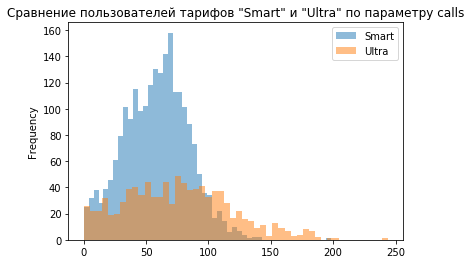

In [55]:
compare_groups(data, 'tariff', 'calls', 50)

Пользователи тарифа "Ультра" совершают больше звонков, чем пользователи тарифа "Смарт" (различия значимые), при этом у пользователей тарифа "Ультра" больше разброс количества звонков, то есть некоторые звонят сильно больше, а некоторые - меньше.  
Для обеих групп распределение отличается от нормального. У группы пользователей тарифа "Смарт" распределение более пологое. Вероятно, это отчасти связано с тем, что их группа меньше, а отчасти с тем, что они не чувствуют себя ограниченными тарифным лимитом.  
Напротив, распределение количества звонков в группе пользователей тарифа "Ультра" имеет выраженный пик, а разброс распределения меньше (меньше стандартное отклонение).

Сравним длительность звонков.

Сравнение пользователей тарифов "Smart" и "Ultra" по параметру duration

Описательная статистика


,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2225.0,418.686292,189.656900,0.0,284.0,422.0,545.0,1435.0
ultra,957.0,542.031348,308.978539,0.0,308.0,525.0,756.0,1673.0


Проверка гипотезы H₀ о равенстве генеральных совокупностей

H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой
p-значение: 7.922250065631584e-42
Отвергаем нулевую гипотезу


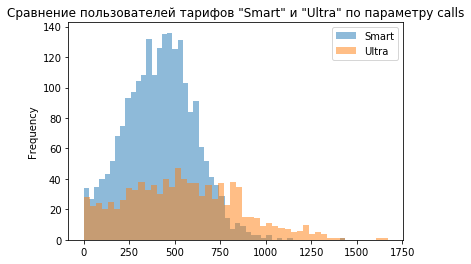

In [56]:
compare_groups(data, 'tariff', 'duration', 50)

Пользователи тарифа "Ультра" тратят больше минут, чем пользователи тарифа "Смарт" (различия значимые), а распределение похоже на то, что мы видели с количеством звонков. У пользователей пользователей тарифа "Ультра" распределение длительности звонков более пологое, а у пользователей тарифа "Смарт" виден выраженный пик.  
По условиям тарифного плана у пользователей тарифа "Ультра" включено 3000 минут, а у пользователей тарифа "Смарт" 300 минут. При этом разница между количеством использованных минут в двух группах не такая большая. Пользователи тарифа "Ультра" тратят сильно меньше лимита, а больше половины пользователей тарифа "Смарт" выходят за пределы предоплаченных минут.

### Сравнение тарифов по количеству исходящих сообщений

Сравним две группы пользователей по количеству исходящих сообщений.

Сравнение пользователей тарифов "Smart" и "Ultra" по параметру messages

Описательная статистика


,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2225.0,33.366292,28.264460,0.0,10.0,28.0,51.0,143.0
ultra,957.0,48.726228,46.903402,0.0,5.0,39.0,79.0,224.0


Проверка гипотезы H₀ о равенстве генеральных совокупностей

H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой
p-значение: 2.0376603523852875e-29
Отвергаем нулевую гипотезу


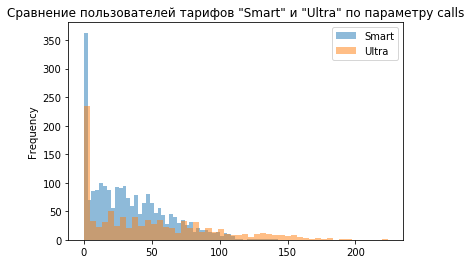

In [57]:
compare_groups(data, 'tariff', 'messages', 50)

Распределение в обеих группах отличается от нормального. Судя по графику значительная часть пользователей обоих тарифов вообще не пользуется сообщениями. В среднем пользователи тарифа "Ультра" посылают больше сообщений, чем пользователи тарифа "Смарт", и разброс в группе пользователей тарифа "Ультра" больше.  
По условиям тарифного плана в тариф "Смарт" включено 50 сообщений, а в тариф "Ультра" - 1000 сообщений. Так же, как со звонками, пользователи тарифа "Ультра" не используют свой предоплаченный лимит, тогда как около четверти пользователей тарифа "Смарт" превышают свой.

### Сравнение тарифов по объёму трафика

Сравнение пользователей тарифов "Smart" и "Ultra" по параметру gb_used

Описательная статистика


,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2225.0,16.315056,5.770808,0.0,13.0,17.0,20.0,38.0
ultra,957.0,19.365726,9.978743,0.0,12.0,19.0,27.0,49.0


Проверка гипотезы H₀ о равенстве генеральных совокупностей

H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой
p-значение: 8.330243861219156e-27
Отвергаем нулевую гипотезу


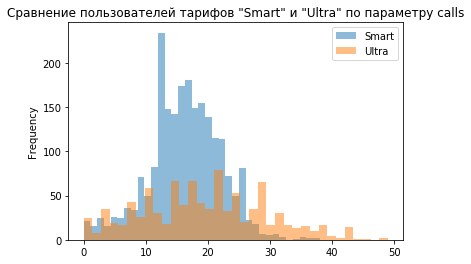

In [58]:
compare_groups(data, 'tariff', 'gb_used', 35)

Распределение количества использованного трафика по форме больше напоминает нормальное, при этом распределение в группе пользователей тарифа "Ультра" выглядит практически симметричным, а в группе пользователей тарифа "Смарт" немного скошено влево. 
Средние значения различаются не очень сильно, но различия значимые, то есть пользователи тарифа "Ультра" тратят больше трафика, чем пользователи тарифа "Смарт" (хотя и не намного).  
По условиям тарифного плана в тариф "Смарт" включены 15 Гб интернет-трафика, в тариф "Ультра" - 30 Гб. Тратят больше более половины пользователей тарифа "Смарт" и чуть меньше четверти пользователей тарифа "Ультра".

### - Сравнение общей выручки с тарифов
При помощи функции `compare_groups` поверим нашу гипотезу 1:  
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Сравнение пользователей тарифов "Smart" и "Ultra" по параметру total_income

Описательная статистика


,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2225.0,1290.225169,819.052589,550.0,550.0,1023.0,1750.0,6770.0
ultra,957.0,2070.219436,378.351486,1950.0,1950.0,1950.0,1950.0,4800.0


Проверка гипотезы H₀ о равенстве генеральных совокупностей

H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой
p-значение: 2.7573403948209683e-156
Отвергаем нулевую гипотезу


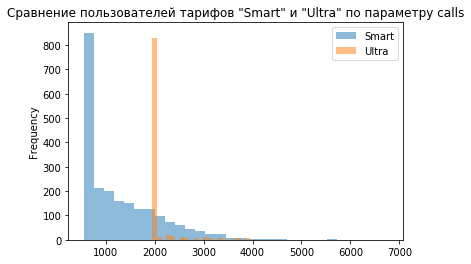

In [59]:
compare_groups(data, 'tariff', 'total_income', 30)

По наблюдаемым данным можно сделать вывод, что наше предположение с большой вероятностью верно и средняя выручка по тарифу "Ультра" и "Смарт" действительно различается.  
Средняя выручка по тарифу "Ультра" выше средней выручки по тарифу "Ультра".  
За пределы включённых в тариф услуг пользователи тарифа "Ультра" выходят очень редко (и, как мы видели на предыдущих графиках - только за счёт небольшого объёма предоплаченного трафика). А вот пользователи тарифа "Смарт" выходят за пределы предоплаченных услуг очень часто (более половины пользователей платит что-то сверх абонентской платы), а часть платит в итоге даже больше, чем стоит тариф "Ультра".  


### Вывод об особенностях поведения пользователей тарифов "Ultra" и "Smart"
С большой степенью достоверности средняя выручка по тарифу "Ultra" выше, чем средняя выручка по тарифу "Smart" (вероятность ошибки крайне мала).  
Пользователи  тарифа "Ultra" совершают больше звонков, отправляют больше сообщений и используют больше интернет-трафика, но редко покупают дополнительные услуги связи сверх включённых в тариф (если покупают, то только дополнительный трафик).  
Пользователи тарифа "Smart" совершают меньше звонков, отправляют меньше исходящих сообщений и используют меньше интернет-трафика, но при этом большое количество пользователей покупает дополнительные услуги связи сверх включённых в тариф. Более половины пользователей покупают дополнительные минуты и интернет-трафик, более четверти покупают дополнительные сообщения. 


### Сравнение средней выручки пользователей из Москвы и выручки пользователей из других регионов
Проверим гипотезу 2:  
Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.  

Выведем описательную статистику выручки для пользователей из Москвы и регионов.

In [60]:
print(color.BOLD + color.BLUE + 'Описательная статистика' + color.END)
display(data.groupby('moscow')['total_income'].describe())  

Описательная статистика


,count,mean,std,min,25%,50%,75%,max
moscow,,,,,,,,
False,2572.0,1519.774106,810.933048,550.0,750.00,1561.0,1950.0,6770.0
True,610.0,1546.052459,752.527584,550.0,778.75,1750.0,1950.0,5321.0


Проверим статистическую гипотезу о равенстве средних двух генеральных совокупностей.

In [61]:
print(color.BOLD + color.BLUE + 'Проверка гипотезы H₀ о равенстве генеральных совокупностей' + color.END)
sample_1 = data.query('moscow == True')['total_income']
sample_2 = data.query('moscow == False')['total_income']        

alpha = 0.01  
results = st.ttest_ind(sample_2, sample_1, equal_var=False)

print('H₀: средние двух генеральных совокупностей равны между собой')
print('H₁: средние двух генеральных совокупностей не равны между собой')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print(color.RED + 'Отвергаем нулевую гипотезу' + color.END)
else:
    print(color.GREEN + 'Не получилось отвергнуть нулевую гипотезу' + color.END) 


Проверка гипотезы H₀ о равенстве генеральных совокупностей
H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой
p-значение: 0.4452390325541491
Не получилось отвергнуть нулевую гипотезу


Средние значения выручки пользователей из Москвы и из регионов различаются незначительно, а нулевую гипотезу о равенстве генеральных совокупностей отвергнуть не удалось.

### Вывод об особенностях поведения пользователей тарифов "Ultra" и "Smart"
По наблюдаемым данным нет возможности сделать вывод о том, что выручка пользователей из Москвы и пользователей из регионов различается.


## Общий вывод

**Краткий обзор проведённой работы**  

Данные подготовлены к работе. Данные по столбцам проанализированы, проверены на наличие ошибок и пропусков. Изменён тип данных столбцов в тех случаях, где он не соответствовал цели. Данные проверены на наличие дублирующихся строк.  
Рассчитаны и добавлены в таблицу параметры: количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя.  
Проведён статистический анализ данных. Проанализированы особенности поведения клиентов на каждом из тарифных планов, построены графики. Проверены гипотезы.

**Выводы**  
1. С большой степенью достоверности средняя выручка по тарифу "Ultra" выше, чем средняя выручка по тарифу "Smart" (вероятность ошибки крайне мала).  
2. Пользователи  тарифа "Ultra" совершают больше звонков, отправляют больше сообщений и используют больше интернет-трафика, но редко покупают дополнительные услуги связи сверх включённых в тариф (если покупают, то только дополнительный трафик).  
3. Пользователи тарифа "Smart" совершают меньше звонков, отправляют меньше исходящих сообщений и используют меньше интернет-трафика, но при этом большое количество пользователей покупает дополнительные услуги связи сверх включённых в тариф. Более половины пользователей покупают дополнительные минуты и интернет-трафик, более четверти покупают дополнительные сообщения.   
4. По наблюдаемым данным нет возможности сделать вывод о том, что выручка пользователей из Москвы и пользователей из регионов различается.
